## MNIST Neural Network

Book: (http://neuralnetworksanddeeplearning.com/index.html) Neural Networks and Deep Learning by Michael Nielsen.

Source code: <a target=dkdk href="https://zoo.cs.yale.edu/classes/cs370/aima/neural-networks-and-deep-learning/src/">https://zoo.cs.yale.edu/classes/cs370/aima/neural-networks-and-deep-learning/src/</a>

From (https://github.com/mnielsen/neural-networks-and-deep-learning.git)

MNIST data:  <a target=dkdk href="https://zoo.cs.yale.edu/classes/cs370/aima/neural-networks-and-deep-learning/data/">https://zoo.cs.yale.edu/classes/cs370/aima/neural-networks-and-deep-learning/data/</a> (compressed pickle format)

### Import MNIST data

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
len(training_data)

50000

In [3]:
len(test_data)

10000

In [4]:
len(validation_data)

10000

In [5]:
training_data[0]

(array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

A 28 x 28 array (784 elements) plus a 10 element array. training_data[0] is a numeral 5.

In [15]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

2025-04-05 10:17:09.884067: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-05 10:17:09.892687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 10:17:09.896952: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 10:17:09.904049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743862629.917966  658148 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743862629.92

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


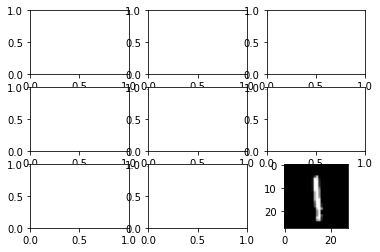

In [16]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [11]:
import matplotlib.pyplot
%matplotlib inline

In [14]:
training_data[0][0].shape

(784, 1)

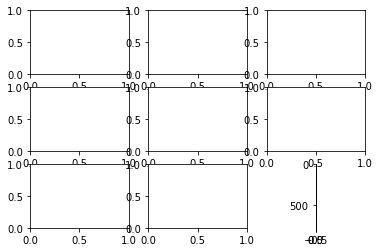

In [13]:
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
pyplot.imshow(training_data[i][0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

We are going to train a neural network on these data.  It will have an input layer comprising 784 neurons and a hidden layer of 30 neurons. (The picture shows 15 neurons in the hidden layer.) The output layer is 10 neurons, corresponding to the digits 0 - 9.  Only one of the output neurons will be activated.

<img src="http://neuralnetworksanddeeplearning.com/images/tikz12.png">

In [6]:
import network

In [7]:
net = network.Network([784,30,10])

In [8]:
dir(net)

['SGD',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'backprop',
 'biases',
 'cost_derivative',
 'evaluate',
 'feedforward',
 'num_layers',
 'sizes',
 'update_mini_batch',
 'weights']

The SGD method is Stochastic Gradiant Descent.  See (https://en.wikipedia.org/wiki/Stochastic_gradient_descent). It minimizes an objective function.

We invoke SGD on the training data, 
<pre>
 def SGD(self, training_data, epochs, mini_batch_size, eta,                                        
            test_data=None):                                                                          
        """Train the neural network using mini-batch stochastic                                       
        gradient descent.  The ``training_data`` is a list of tuples                                  
        ``(x, y)`` representing the training inputs and the desired                                   
        outputs.  The other non-optional parameters are                                               
        self-explanatory.  If ``test_data`` is provided then the                                      
        network will be evaluated against the test data after each                                    
        epoch, and partial progress printed out.  This is useful for                                  
        tracking progress, but slows things down substantially.""" 
</pre>

mini_batch_size is how large a batch to process at a time.  Below we process 10 
examples at a time.

eta is the Greek letter &eta; which is the learning rate.  Below the learning rate is 3.

Timing is done through calls to time.time() before and after runs.  Below it takes less than 3 seconds per epoch.

In [9]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9061 / 10000, took 2.40 seconds
Epoch 1: 9242 / 10000, took 2.73 seconds
Epoch 2: 9272 / 10000, took 2.44 seconds
Epoch 3: 9317 / 10000, took 2.37 seconds
Epoch 4: 9391 / 10000, took 2.44 seconds
Epoch 5: 9373 / 10000, took 2.39 seconds
Epoch 6: 9386 / 10000, took 2.39 seconds
Epoch 7: 9417 / 10000, took 2.37 seconds
Epoch 8: 9446 / 10000, took 2.44 seconds
Epoch 9: 9442 / 10000, took 2.65 seconds
Epoch 10: 9412 / 10000, took 2.43 seconds
Epoch 11: 9409 / 10000, took 2.39 seconds
Epoch 12: 9450 / 10000, took 2.57 seconds
Epoch 13: 9471 / 10000, took 2.56 seconds
Epoch 14: 9472 / 10000, took 2.56 seconds
Epoch 15: 9477 / 10000, took 2.37 seconds
Epoch 16: 9466 / 10000, took 2.40 seconds
Epoch 17: 9480 / 10000, took 2.37 seconds
Epoch 18: 9498 / 10000, took 2.51 seconds
Epoch 19: 9488 / 10000, took 2.43 seconds
Epoch 20: 9496 / 10000, took 2.43 seconds
Epoch 21: 9480 / 10000, took 2.38 seconds
Epoch 22: 9503 / 10000, took 2.45 seconds
Epoch 23: 9513 / 10000, took 2.41 seconds
Ep

Now we change the number of hidden neurons to 100.  We use the same epochs and other parameters.  The time per epoch is now 8 seconds or so.

In [10]:
 net = network.Network([784, 100, 10])

In [11]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 6718 / 10000, took 7.61 seconds
Epoch 1: 6775 / 10000, took 7.61 seconds
Epoch 2: 6927 / 10000, took 7.60 seconds
Epoch 3: 7795 / 10000, took 7.67 seconds
Epoch 4: 8645 / 10000, took 7.57 seconds
Epoch 5: 8692 / 10000, took 7.62 seconds
Epoch 6: 8707 / 10000, took 7.59 seconds
Epoch 7: 8711 / 10000, took 7.59 seconds
Epoch 8: 8748 / 10000, took 7.54 seconds
Epoch 9: 8710 / 10000, took 7.70 seconds
Epoch 10: 8754 / 10000, took 7.55 seconds
Epoch 11: 8762 / 10000, took 7.63 seconds
Epoch 12: 8771 / 10000, took 7.62 seconds
Epoch 13: 8773 / 10000, took 7.66 seconds
Epoch 14: 8785 / 10000, took 7.68 seconds
Epoch 15: 8794 / 10000, took 7.66 seconds
Epoch 16: 8789 / 10000, took 7.60 seconds
Epoch 17: 8797 / 10000, took 7.61 seconds
Epoch 18: 8788 / 10000, took 7.65 seconds
Epoch 19: 8809 / 10000, took 7.70 seconds
Epoch 20: 8793 / 10000, took 7.59 seconds
Epoch 21: 8817 / 10000, took 7.69 seconds
Epoch 22: 8813 / 10000, took 7.63 seconds
Epoch 23: 8809 / 10000, took 7.60 seconds
Ep